In [20]:
import numpy as np
import hasasia.sensitivity as sens
import hasasia.sim as sim

import matplotlib.pyplot as plt
import matplotlib as mpl

Make randomly spaced pulsars

In [8]:
phi = np.random.uniform(0, 2*np.pi, size=34)
theta = np.random.uniform(0, np.pi, size=34)

pulsars = sim.sim_pta(timespan=11.4, cad=23, sigma=1e-7, 
                   phi=phi, theta=theta, Npsrs=34)
# timespan of observations = T

Make spectra object for each pulsar

In [12]:
# freqs = np.logspace(np.log10(5e-10), np.log10(5e-7),400)
# same thing:
freqs = (np.geomspace(5e-10, 5e-7, 400))
spectra = []

for pul in pulsars:
    sp = sens.Spectrum(pul, freqs=freqs) # spectrum object
    sp.NcalInv # calculate inverse noise weighted transmission function along the way
    spectra.append(sp)

Enter spectra into GWB and deterministic sensitivity curve classes

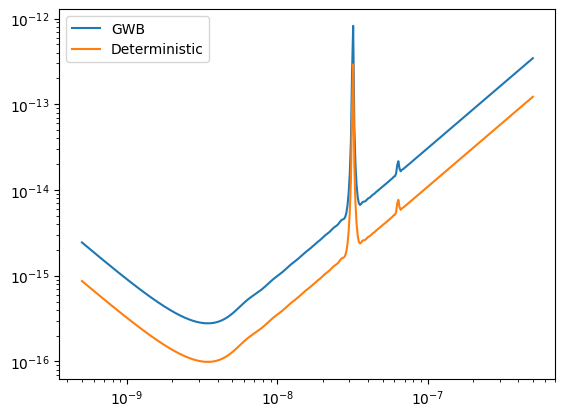

In [39]:
scGWB = sens.GWBSensitivityCurve(spectra)
scDeter = sens.DeterSensitivityCurve(spectra)

plt.loglog(scGWB.freqs, scGWB.h_c, label='GWB')
plt.loglog(scDeter.freqs, scDeter.h_c, label='Deterministic')
plt.legend()

Do I have parameters here that I need for my detection statistics?
* sigma? other noise like red noise?
* theta_i, phi_i (yes)
* 

Compare to 3 year baseline 

# Questions
* What is the transmission function (I get inverse-noise weighted)
* How are sensitivity curves calculated and does this just mean what min strain the inputted pulsar array is capable of detecting?